## Capstone Project: My Grocery Finder  (myGF)

cap1

## 1. Problem Statement

Do you ever remember times where you have spent a large amount of time finding a grocery that you need at a particularly large supermarket? Groceries in a supermarket are organised into rows and categories. It is often difficult to pin point the exact location of the particular grocery that you need.  

In today's technologial landscape, we are able to leverage techniques such as **deep learning** to easily classify images or even speech. For this use case, we will make use of **Convolutional Neural Networks** (CNN) and transfer learning to help with the classification of groceries. This can then add value to supermarkets in the form of helping grocers find their groceries in a shorter time. A proposal might be to add kiosks around the supermarket with the image classifer. Grocers will only need to scan a photo or image of their grocery and the kiosk will return the row and column locations of the particular grocery.

cap2
Yay, candy can now be found easily!

### 1.1 Deep learning
cap3  


Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. For humans, images are first processed by our eyes and the signal gets passed through a series of neurons before reaching our brain. Our brain then consolidates the image information and presents it in an understandble format for us.

Similarly for deep learning in data science, data such as images are passed through layers that recognises salient features of that particular image. These features are then condensed and used to classify an image in our case. Specifically for this project, we will use a branch of deep learning - convolutional neural network to classify our groceries.

### 1.2 Convolutional Neural Networks

In machine learning, a convolutional neural network (CNN, or ConvNet) is a class of deep, feed-forward artificial neural networks where images are broken down into number matrices and fed through layers for analysis in a forward direction.  

CNN, in a nutshell, is made up of 4 main operations:
1. Convolution
2. Non Linearity (ReLU)
3. Pooling or Sub Sampling
4. Classification (Fully Connected Layer)

cap4

#### 1.2.1 Convolution
The reason why CNN are called as such is because of the Convolution function. Images are first processed into pixel values (red, green and blue colour in the range of 0 to 255 for each colour channel). Each image is simply converted into a matrix of numbers. 

We will next define a matrix of 3x3 size with arbitrarily assigned weights to be used to slide across our image matrix. Dot products of the matrices will then be computed and this effectively reduces our original matrix into a feature map. The animation below explains how the convolution is performed and how the output is computed:

cap5  

Depending on the weights assigned, different feature maps will be obtained. These feature maps will then be used to classify our images.

#### 1.2.2 Recitfied Linear Unit (ReLU) Activation

An additional operation called ReLU has been used after every Convolution operation. ReLU stands for Rectified Linear Unit and is a non-linear operation. It simply replaces negative values with 0.

ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLU is to introduce non-linearity in our ConvNet. We would use ReLU for images as real world images consist of mostly non-linear features. The figure below illustrates the effect of ReLU activation on a processed image.

cap 6

#### 1.2.3 Pooling

Image matrices tend to be large. We would often apply pooling techniques to reduce the dimension of our feature maps. Max pooling is the typical pooling method we would use. In max pooling, we will first set a window (2x2 in this case) to slide through our feature map. Max pooling will take only the largest element for every step. Visually, the figure below shows how max pooling is performed:

cap7

#### 1.2.4 Fully Connected Layer
The Fully Connected layer is a traditional Multi Layer Perceptron that uses a softmax activation function in the output layer. The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer. The softmax activation function helps to reassign the computed values such that it adds up to 1, while highlighting the max value.  

Fully connected layers often occur toward the end of a ConvNet. This is due to the fact that the output layer (final classification step) must be connected to all neurons of the previous layer.

### 1.3 Training the ConvNet
The ConvNet model is trained according to the following schema:

- Step1: We initialize all filters and parameters / weights with random values

- Step2: The network takes a training image as input, goes through the forward propagation step (convolution, ReLU and pooling operations along with forward propagation in the Fully Connected layer) and finds the output probabilities for each class.
    - Lets say the output probabilities for the boat image above are [0.2, 0.4, 0.1, 0.3]
    - Since weights are randomly assigned for the first training example, output probabilities are also random.  
      
      
- Step3: Calculate the total error at the output layer (summation over all 4 classes)
    - Total Error = ∑  ½ (target probability – output probability) ²  
      
      
- Step4: Use Backpropagation to calculate the gradients of the error with respect to all weights in the network and use gradient descent to update all filter values / weights and parameter values to minimize the output error.
    - The weights are adjusted in proportion to their contribution to the total error.
    - When the same image is input again, output probabilities might now be [0.1, 0.1, 0.7, 0.1], which is closer to the target vector [0, 0, 1, 0].
    - This means that the network has learnt to classify this particular image correctly by adjusting its weights / filters such that the output error is reduced.
    - Parameters like number of filters, filter sizes, architecture of the network etc. have all been fixed before Step 1 and do not change during training process – only the values of the filter matrix and connection weights get updated.  
      
      
- Step5: Repeat steps 2-4 with all images in the training set.


The above steps train the ConvNet – this essentially means that all the weights and parameters of the ConvNet have now been optimized to correctly classify images from the training set.

Visually, the training and the architecture of the ConvNet are as such:

cap8 

## 2. Dataset
The dataset used for this project is the GroZi-120 database from the University of California, San Diego. [Link to dataset](http://grozi.calit2.net/grozi.html). The database consists of photographs (training set) / google images of groceries. We will be building a ConvNet to classify 17 grocery items:
1. Wiggly double mint
2. Big red - gum
3. Lays classic chips
4. Pepperidge farm milano cookies
5. Starbucks frappucino
6. Oberto beef jerky
7. Honey nut cheerios
8. Tostitos scoops
9. Ruffles sour cream chips
10. Hersheys milk chocolate
11. Twix cookie bar
12. Snickers bar
13. Tic tac winter
14. Dentyne ice sweets
15. Starburst
16. Rockstar beer
17. Nestle crunch

cap 9

### Packages used
1. pandas
2. numpy
3. os
4. cv2
5. matplotlib/seaborn
6. sci-kit learn
7. keras (tensorflow-gpu)

## 3. Preprocessing images
Images will have to be read in as a matrix. In order to increase computational efficiency and speed, images and downscaled to 128 x 128 pixels. 3 colour channels (red, green, blue) will be read into the matrix. Each image processed will result in a 128 x 128 x 3 matrix.  

Since each grocery has only 100+ images for training, which is insufficient for building a ConvNet, we will make use of keras' data generator function, to augment the images.

In [43]:
# Image augmentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

class_size=1000

In [69]:
it = 0
# Use counts for individual values, generate enough images till it hits roughly 1000
for count in label_counts.values:
    #nb of generations per image for this class label in order to make it size ~= class_size
    ratio=math.floor(class_size/count)-1
    print(count,count*(ratio+1))
    dest_lab_dir=os.path.join(dest_train_dir,str(label_counts.index[it]))
    src_lab_dir=os.path.join(src_train_dir,str(label_counts.index[it]))
    if not os.path.exists(dest_lab_dir):
        os.makedirs(dest_lab_dir)
    for file in os.listdir(src_lab_dir):
        img=load_img(os.path.join(src_lab_dir,file))
        #img.save(os.path.join(dest_lab_dir,file))
        x=img_to_array(img) 
        x=x.reshape((1,) + x.shape)
        i=0
        for batch in datagen.flow(x, batch_size=1,save_to_dir=dest_lab_dir, save_format='jpg'):
            i+=1
            if i > ratio:
                break 
    it=it+1

509 509
495 990
465 930
314 942
273 819
242 968
215 860
209 836
203 812
184 920
174 870
171 855
148 888
145 870
120 960
106 954
104 936


** Number of images per grocery after augmentation and generation **

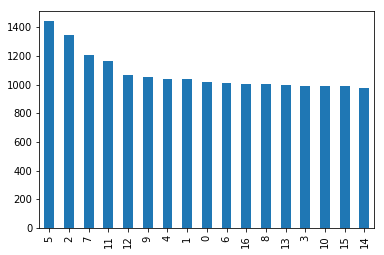

In [4]:
augcount = pd.DataFrame(aug_label)
augcount[0].value_counts().plot(kind='bar')

### 3.1 Generating matrix of images using cv2

We will use cv2's imread function to read in the images into matrices followed by a normalisation step of dividing each pixel value by 255. Since pixel values range between 0-255, the normalisation step serves to eliminate any scaling issues while building the model.


In [5]:
# Training dataset
# Read image using cv2, then append matrix to list

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

Loaded the images of dataset-8

Loaded the images of dataset-4

Loaded the images of dataset-11

Loaded the images of dataset-6

Loaded the images of dataset-12

Loaded the images of dataset-15

Loaded the images of dataset-0

Loaded the images of dataset-10

Loaded the images of dataset-5

Loaded the images of dataset-3

Loaded the images of dataset-14

Loaded the images of dataset-7

Loaded the images of dataset-13

Loaded the images of dataset-16

Loaded the images of dataset-9

Loaded the images of dataset-1

Loaded the images of dataset-2



In [6]:
# Make matrix into arrays

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(18337, 128, 128, 3)


### 3.2 Shuffling then train test split the dataset

After reading in the images into matrices. The matrix is shuffled records-wise to reduce bias and split into training and test sets (70% training, 30% test split).